### Code for final milestone
#### This is the supporting code behind the graphics included in the final case study write up.  

#### This section is the file import and selecting which features I want to work with

In [43]:
# Import the # Libraries
import pandas as pd
import numpy as np
import yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

In [2]:
# Import the csv file 
murder = pd.read_csv('Murder.csv')

# Check the header
murder.head(5)

,State,Agency,Agentype,Year,StateName,Month,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,VicCount,OffCount
0,Oklahoma,Tulsa,Municipal police,2005,NaN,July,50,Male,Native American/Alaskan,40,Male,Native American/Alaskan,Asphyxiation,Acquaintance,0,1
1,Washington,Seattle,Municipal police,1998,NaN,May,33,Female,Native American/Alaskan,28,Male,Native American/Alaskan,Asphyxiation,Acquaintance,0,0
2,Alaska,Dillingham,Municipal police,2006,NaN,September,41,Female,Native American/Alaskan,43,Male,Native American/Alaskan,Asphyxiation,Acquaintance,0,0
3,Oregon,Umatilla Tribal,Tribal,1986,NaN,December,20,Female,Native American/Alaskan,36,Male,Native American/Alaskan,Asphyxiation,Girlfriend,0,0
4,Oregon,Umatilla Tribal,Tribal,1986,NaN,December,30,Female,Native American/Alaskan,36,Male,Native American/Alaskan,Asphyxiation,Girlfriend,0,0


In [3]:
# Pull the columns I want
murder_col = murder[['State','Agentype','Year','Month','VicAge','VicSex','VicRace','OffAge','OffSex','OffRace','OffAge','Weapon','Relationship']]

In [4]:
# Due to the size of this data set, I'm going to focus on homicies in the midwest
murder_states = murder_col[murder_col['State'].isin(['North Dakota', 'South Dakota', 'Nebraska', 
                                                     'Kansas', 'Minnesota', 'Wisconsin', 'Iowa', 
                                                     'Illinois', 'Indiana', 'Michigan', 'Ohio'])]



In [7]:
# Remove rows with ubnknown victim sex
index_names = murder_states[ murder_states['VicSex'] == 'Unknown' ].index
murder_states.drop(index_names, inplace = True)

In [8]:
murder_states.to_csv('murder_states.csv')

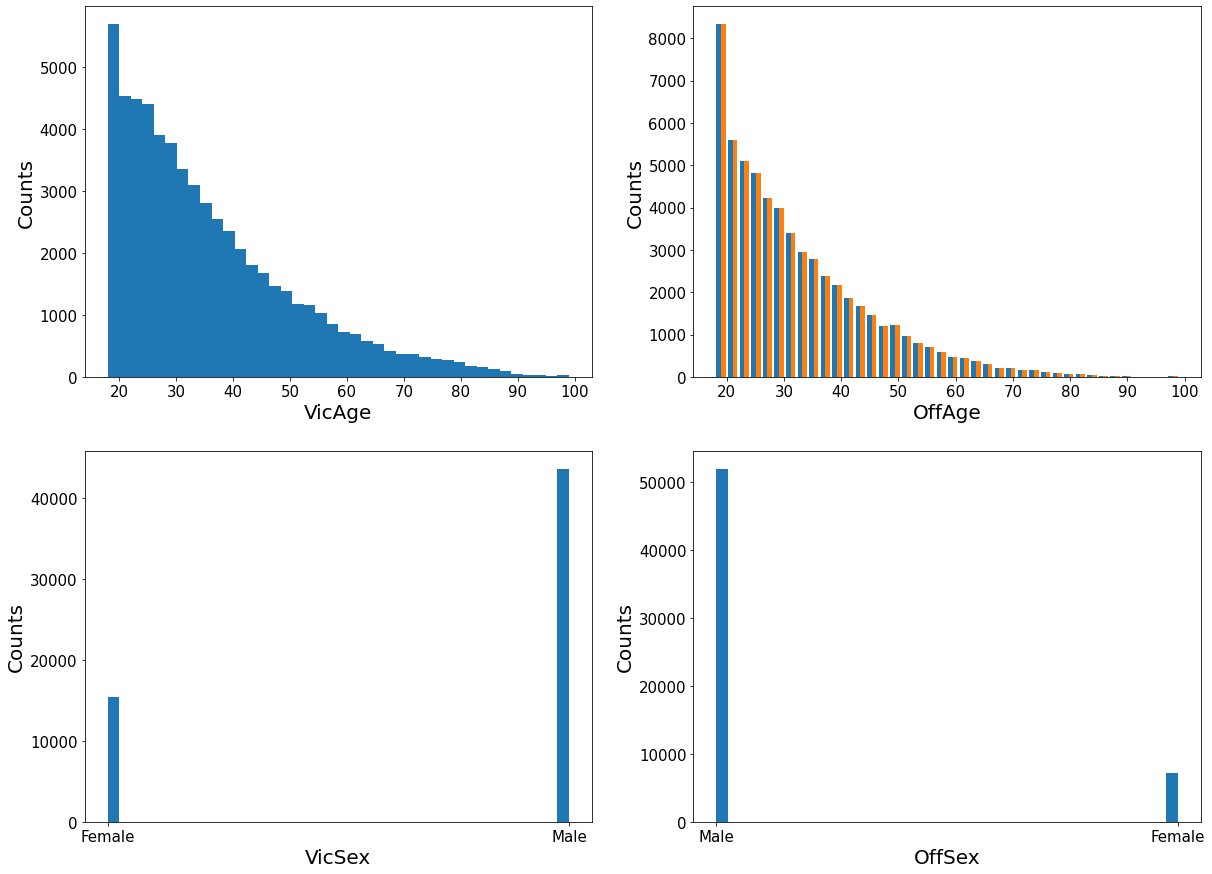

In [9]:
# Set up the paramenters and make the histograms for: victim sex, age and offender sex, age
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 15)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['VicAge', 'OffAge', 'VicSex', 'OffSex']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw the histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(murder_states[num_features[idx]].dropna(), 
            bins = 40)
    ax.set_xlabel(xaxes[idx], 
                  fontsize = 20)
    ax.set_ylabel(yaxes[idx], 
                  fontsize = 20)
    ax.tick_params(axis='both', 
                   labelsize = 15)
plt.show()

Text(0.5, 1.0, 'Victim Sex per State')

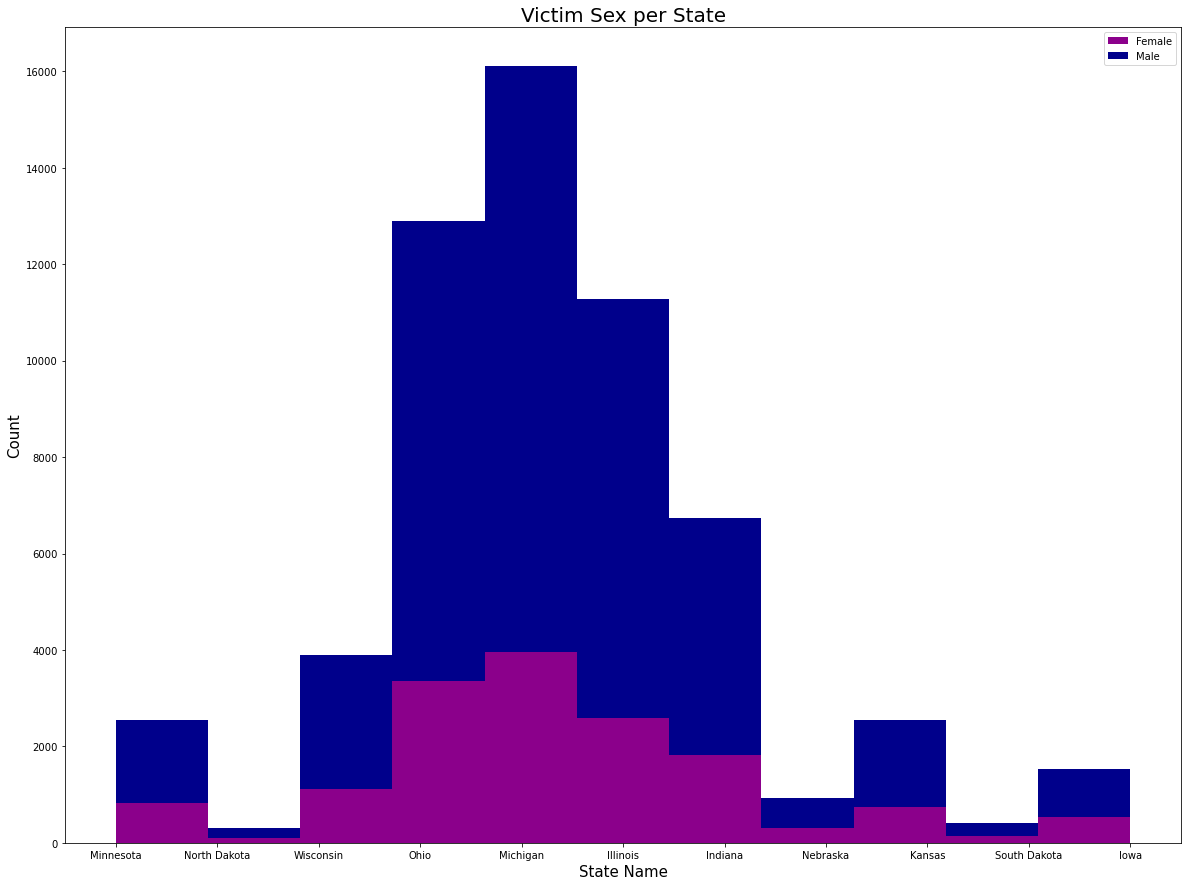

In [11]:
# Compare the victim's sex per state homicide

# Create the the female and male variables
vic_fe = murder_states[murder_states['VicSex'] == 'Female']
vic_ma = murder_states[murder_states['VicSex'] == 'Male']


# Assign colors for the victim's sex
colors = ['darkmagenta', 'darkblue']
names = ['Female', 'Male']
         
# Make the graph
plt.hist([vic_fe.State, vic_ma.State],
          bins = int(55/5), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend()
plt.xlabel('State Name', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Victim Sex per State', 
          fontsize = 20,
          color = 'black')

Text(0.5, 1.0, 'Victim Age and Sex')

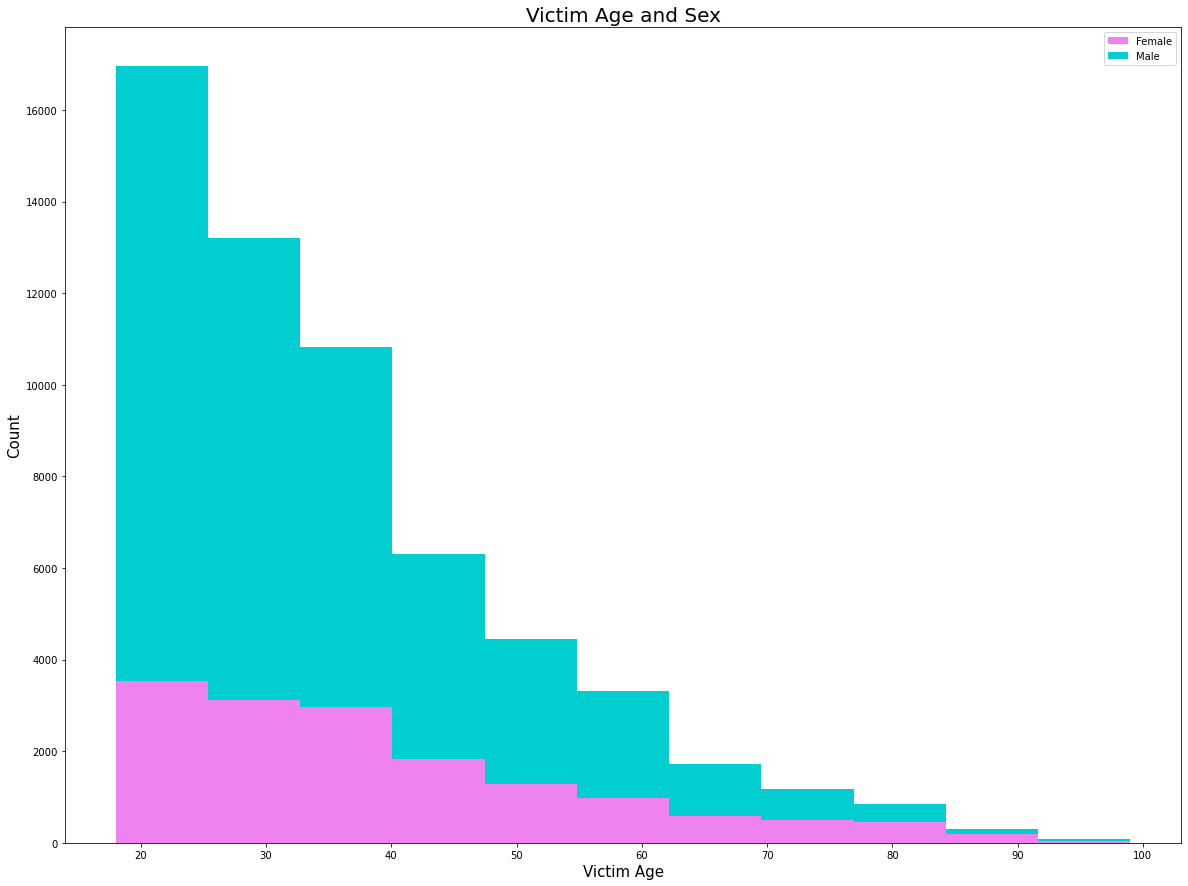

In [12]:
# Compare the victim's sex according to age

# Create the the female and male variables
age_fe = murder_states[murder_states['VicSex'] == 'Female']
age_ma = murder_states[murder_states['VicSex'] == 'Male']


# Assign colors for the victim's sex
colors = ['violet', 'darkturquoise']
names = ['Female', 'Male']

# Make the graph
plt.hist([age_fe.VicAge, age_ma.VicAge],
          bins = int(55/5), 
         stacked = True,
         color = colors, 
         label = names)

# Plot formatting
plt.legend()
plt.xlabel('Victim Age', 
          fontsize = 15,
          color = 'black')
plt.ylabel('Count', 
          fontsize = 15,
          color = 'black')
plt.title('Victim Age and Sex', 
          fontsize = 20,
          color = 'black')

In [15]:
# Look at the statisitics to gain additional insgiht into the data
print('Describe Data')
print(states.describe())
print(' ')
print('Summarized Data')
print(states.describe(include=['O']))

Describe Data
          Unnamed: 0          Year        VicAge        OffAge      OffAge.1
count   59150.000000  59150.000000  59150.000000  59150.000000  59150.000000
mean   171837.917329   1995.675232     36.089467     32.619679     32.619679
std    104895.798673     13.198003     14.953686     12.671660     12.671660
min        12.000000   1976.000000     18.000000     18.000000     18.000000
25%     79261.750000   1984.000000     25.000000     23.000000     23.000000
50%    165606.000000   1994.000000     32.000000     29.000000     29.000000
75%    266244.000000   2007.000000     44.000000     39.000000     39.000000
max    354374.000000   2019.000000     99.000000     99.000000     99.000000
 
Summarized Data
           State          Agentype   Month VicSex VicRace OffSex OffRace  \
count      59150             59150   59150  59150   59150  59150   59150   
unique        11                 7      12      2       6      2       5   
top     Michigan  Municipal police  August   Ma

In [18]:
# Set up the number features to look for correlations
num_features1 = ['VicSex', 'OffSex', 'Month']
num_features2 = ['VicAge', 'OffAge', 'Month']

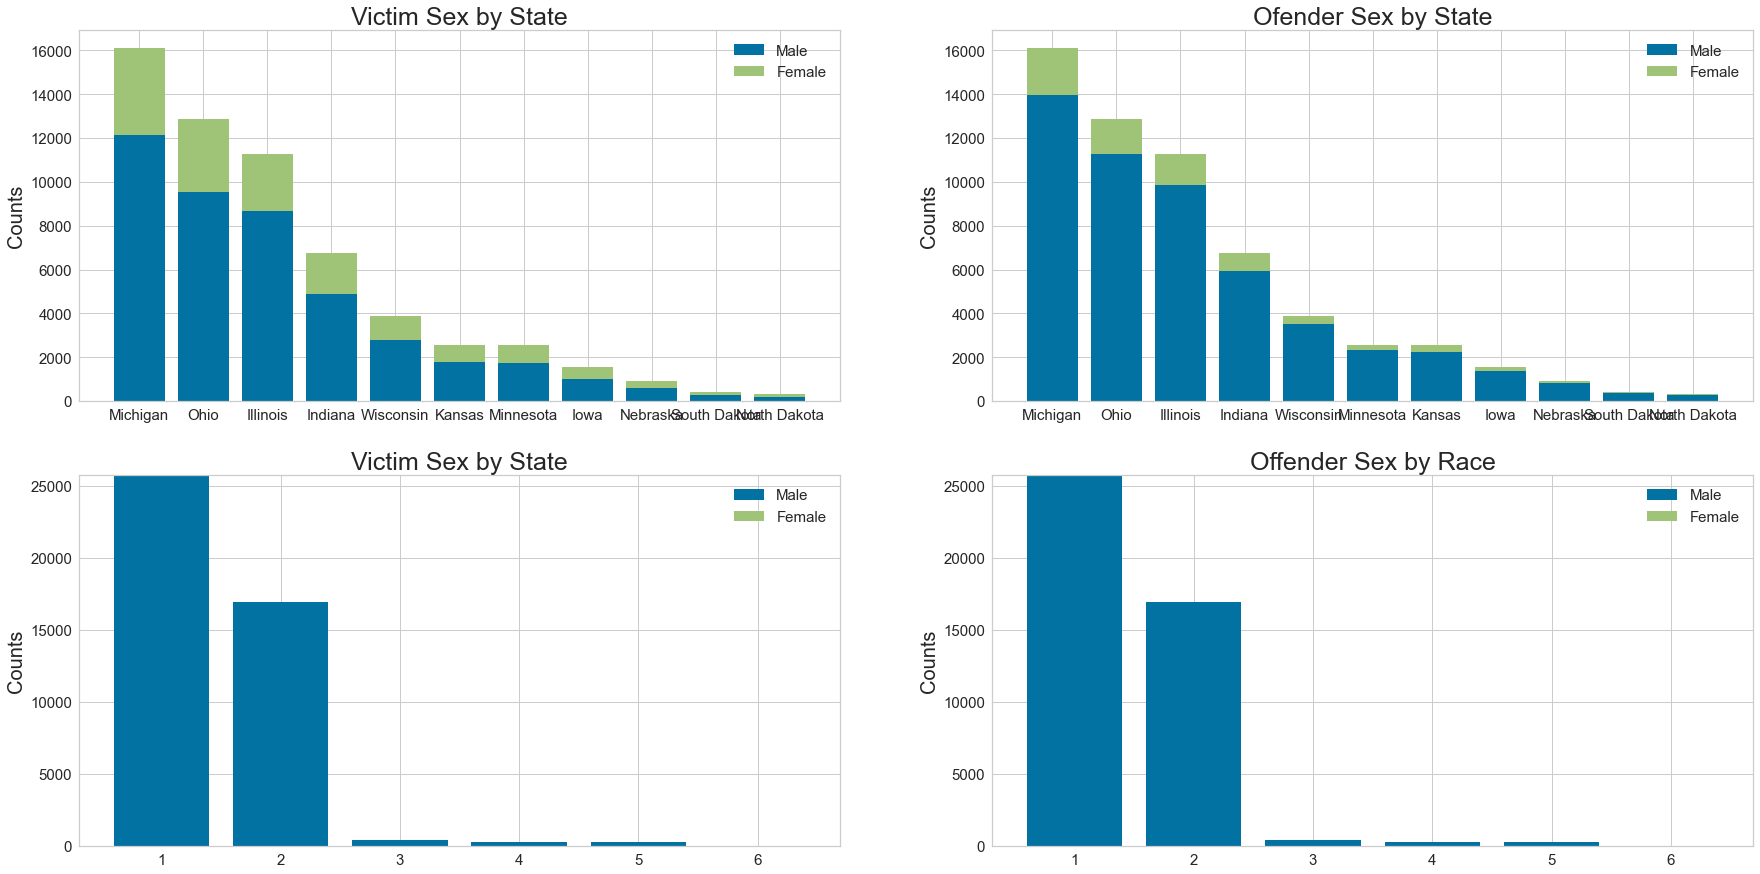

In [25]:
# Create stacked bar charts to compare victim and offender sex and race
# I think I;m starting to narrow the focus to these two demographic categories


# Set up the figure size
plt.rcParams['figure.figsize'] = (30, 15)

# Make the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Victim Sex by state
# Make the data read to feed into the visulizer
states_male = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['VicSex'] == 1]['State'].value_counts()
states_female = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['VicSex'] == 2]['State'].value_counts()
states_female = states_female.reindex(index = states_male.index)
# Create the bar plot
p1 = axes[0, 0].bar(states_male.index, states_male.values)
p2 = axes[0, 0].bar(states_female.index, states_female.values, bottom = states_male.values)
axes[0, 0].set_title('Victim Sex by State', fontsize = 25)
axes[0, 0].set_ylabel('Counts', fontsize = 20)
axes[0, 0].tick_params(axis = 'both', labelsize = 15)
axes[0, 0].legend((p1[0], p2[0]), ('Male', 'Female'), fontsize = 15)

# Offender Sex by State
# Make the data read to feed into the visulizer
off_male = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['OffSex'] == 1]['State'].value_counts()
off_female = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['OffSex'] == 2]['State'].value_counts()
off_female = off_female.reindex(index = off_male.index)
# Create the bar plot
p3 = axes[0, 1].bar(off_male.index, off_male.values)
p4 = axes[0, 1].bar(off_female.index, off_female.values, bottom = off_male.values)
axes[0, 1].set_title('Ofender Sex by State', fontsize = 25)
axes[0, 1].set_ylabel('Counts', fontsize = 20)
axes[0, 1].tick_params(axis = 'both', labelsize = 15)
axes[0, 1].legend((p3[0], p4[0]), ('Male', 'Female'), fontsize = 15)

# Victim Sex by Race
# Make the data read to feed into the visulizer
race_male = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['VicSex'] == 1]['VicRace'].value_counts()
race_female = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['VicSex'] == 2]['State'].value_counts()
race_female = race_female.reindex(index = race_male.index)
# Create the bar plot
p5 = axes[1, 0].bar(race_male.index, race_male.values)
p6 = axes[1, 0].bar(race_female.index, race_female.values, bottom = race_male.values)
axes[1, 0].set_title('Victim Sex by State', fontsize = 25)
axes[1, 0].set_ylabel('Counts', fontsize = 20)
axes[1, 0].tick_params(axis = 'both', labelsize = 15)
axes[1, 0].legend((p5[0], p6[0]), ('Male', 'Female'), fontsize = 15)

# Offender Sex by Race
# Make the data read to feed into the visulizer
o_race_male = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['VicSex'] == 1]['VicRace'].value_counts()
o_race_female = states.replace({'Male': {1: 'Male', 2: 'Female'}})[states['VicSex'] == 2]['State'].value_counts()
o_race_female = o_race_female.reindex(index = o_race_male.index)
# Create the bar plot
p5 = axes[1, 1].bar(o_race_male.index, o_race_male.values)
p6 = axes[1, 1].bar(o_race_female.index, o_race_female.values, bottom = o_race_male.values)
axes[1, 1].set_title('Offender Sex by Race', fontsize = 25)
axes[1, 1].set_ylabel('Counts', fontsize = 20)
axes[1, 1].tick_params(axis = 'both', labelsize = 15)
axes[1, 1].legend((p5[0], p6[0]), ('Male', 'Female'), fontsize = 15)



In [ ]:
# Black and white are both highly represnted when copared to other races, so I want to try transforming them
# First I need to make them numerical
# Convert the text columns to numbersstates_num = states
states_num['Month'] = states['Month'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12])
states_num['VicSex'] = states['VicSex'].replace(['Male','Female'],[1,2])
states_num['OffSex'] = states['OffSex'].replace(['Male','Female'],[1,2])
states_num_feat1 = states_num[['VicAge', 'OffAge', 'Month']]
states_num_feat2 = states_num[['VicSex', 'OffSex','Month']]
states_num['VicRace'] = states['VicRace'].replace(['Black','White','Native American/Alaskan','Unknown','Asian','Hawaiian/Pacific Islander'],[1,2,3,4,5,6])
states_num['OffRace'] = states['OffRace'].replace(['Black','White','Native American/Alaskan','Unknown','Asian','Hawaiian/Pacific Islander'],[1,2,3,4,5,6])


#### This is where the focus started to narrow in on the victim and offender sex, but age was still a variable of interest as well. The question started to become whether or not we could predict if offenders were likely to murder victims of the same sex. 

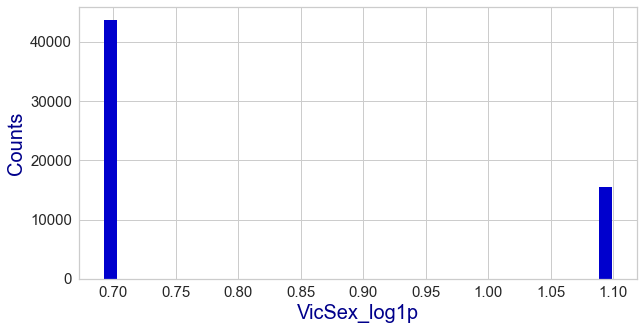

In [66]:
# Create the distribution for victim sex using histogram
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(states_num['VicSex_log1p'], 
         bins = 40, 
         color = 'mediumblue')
plt.xlabel('VicSex_log1p', 
           fontsize = 20, 
           color = 'darkblue')
plt.ylabel('Counts', 
           fontsize = 20, 
           color = 'darkblue')
plt.tick_params(axis = 'both', labelsize = 15)

#Show the plot
plt.show()

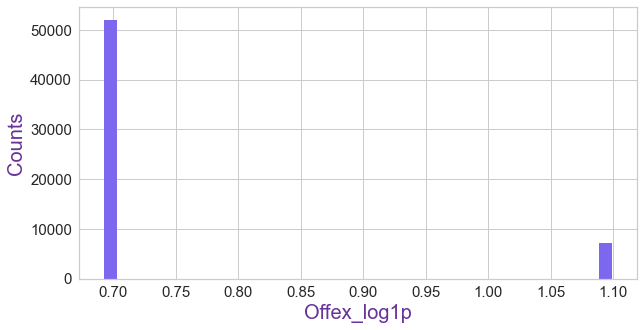

In [67]:
# Create the distribution for offender sex using histogram
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(states_num['OffSex_log1p'], 
         bins = 40, 
         color = 'mediumslateblue')
plt.xlabel('Offex_log1p', 
           fontsize = 20, 
           color = 'rebeccapurple')
plt.ylabel('Counts', 
           fontsize = 20, 
           color = 'rebeccapurple')
plt.tick_params(axis = 'both', labelsize = 15)

#Show the plot
plt.show()

In [50]:
# Set up the number features to look for correlations
num_features1 = ['VicSex', 'OffSex', 'Month']
num_features2 = ['VicAge', 'OffAge', 'Month']
states_num_feat1 = states_num[['VicAge', 'OffAge', 'Month']]
states_num_feat2 = states_num[['VicSex', 'OffSex','Month']]

In [51]:
# Get the categorical data
# Convert the states
cat_features_state = ['VicSex', 'OffSex', "State"]
data_cat_state = states[cat_features_state]

data_cat_state = data_cat_state.replace({'State': {1: 'Illinois', 2: 'Indiana', 3: 'Iowa',
                             4: 'Kansas', 5: 'Michigan', 6: 'Minnesota', 7: 'Nebraska', 
                                                   8: 'North Dakota', 9: 'Ohio', 10: 'South Dakota', 11: 'Wisconsin'}})

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat_state)

# check the data
print(data_cat_dummies.head(8))

   VicSex_Female  VicSex_Male  OffSex_Female  OffSex_Male  State_Illinois  \
0              1            0              0            1               0   
1              1            0              0            1               0   
2              1            0              0            1               0   
3              1            0              0            1               0   
4              1            0              0            1               0   
5              0            1              0            1               0   
6              1            0              0            1               0   
7              1            0              0            1               0   

   State_Indiana  State_Iowa  State_Kansas  State_Michigan  State_Minnesota  \
0              0           0             0               0                1   
1              0           0             0               0                0   
2              0           0             0               0           

In [71]:
# First take a look at the Victim Sex
# Combine the numerical features and the dummie features together
features_model = ['VicSex', 'OffSex']
data_model_X = pd.concat([states[features_model], data_cat_dummies], axis=1)

# Create a whole target dataset that can be used for train and validation data splitting
data_model_y = states.replace({'VicSex': {1: 'Male', 2: 'Female'}})['VicSex']

# Separate data into training and validation and check the details of the datasets
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size = 0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Male and Female
print('\n')
print('No. of male and female in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of male and female in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  41405
No. of samples in validation set: 17745


No. of male and female in the training set:
Male      30598
Female    10807
Name: VicSex, dtype: int64


No. of male and female in the validation set:
Male      13063
Female     4682
Name: VicSex, dtype: int64


In [54]:
# Do the same thing again for Offender Sex
# Combine the numerical features and the dummie features together
features_model = ['VicSex', 'OffSex']
data_model_X = pd.concat([states[features_model], data_cat_dummies], axis=1)

# Create a whole target dataset that can be used for train and validation data splitting
data_model_y = states.replace({'OffSex': {1: 'Male', 2: 'Female'}})['OffSex']

# Separate data into training and validation and check the details of the datasets
# Split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size = 0.3, random_state=11)

# Set the number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Male and Female
print('\n')
print('No. of male and female in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of male and female in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  41405
No. of samples in validation set: 17745


No. of male and female in the training set:
Male      36377
Female     5028
Name: OffSex, dtype: int64


No. of male and female in the validation set:
Male      15610
Female     2135
Name: OffSex, dtype: int64


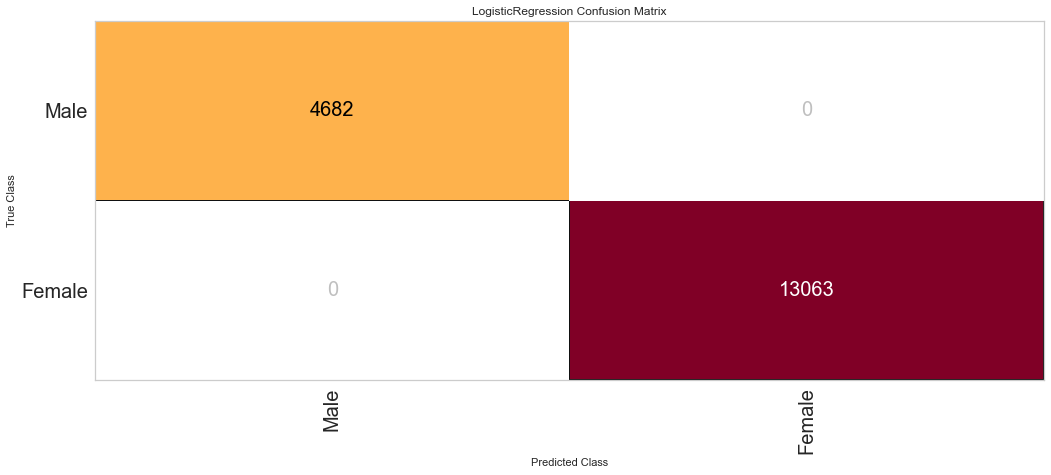

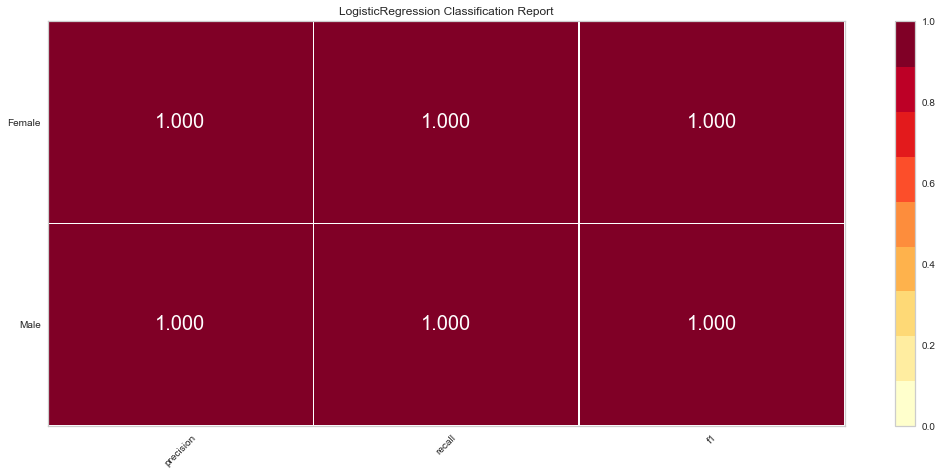

In [105]:
# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Male','Female']
cm = ConfusionMatrix(model, classes = classes, 
                     percent = False)

# Fit fits the passed model. 
cm.fit(X_train, y_train)


# Create the ConfusionMatrix, and then create the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# How did we do?
cm.poof()

# Precision, Recall, and F1 Score, and set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data to the visualizer
# Evaluate the model on the test data
visualizer.fit(X_train, y_train)  
visualizer.score(X_val, y_val)  
g = visualizer.poof()



In [106]:
# Do the same thing again for Offender Sex
# Combine the numerical features and the dummie features together
features_model = ['VicSex', 'OffSex']
data_model_X = pd.concat([states[features_model], data_cat_dummies], axis=1)

# Create a whole target dataset that can be used for train and validation data splitting
data_model_y = states.replace({'OffSex': {1: 'Male', 2: 'Female'}})['OffSex']

# Separate data into training and validation and check the details of the datasets
# Split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size = 0.3, random_state=11)

# Set the number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Male and Female
print('\n')
print('No. of male and female in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of male and female in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  41405
No. of samples in validation set: 17745


No. of male and female in the training set:
Male      36377
Female     5028
Name: OffSex, dtype: int64


No. of male and female in the validation set:
Male      15610
Female     2135
Name: OffSex, dtype: int64


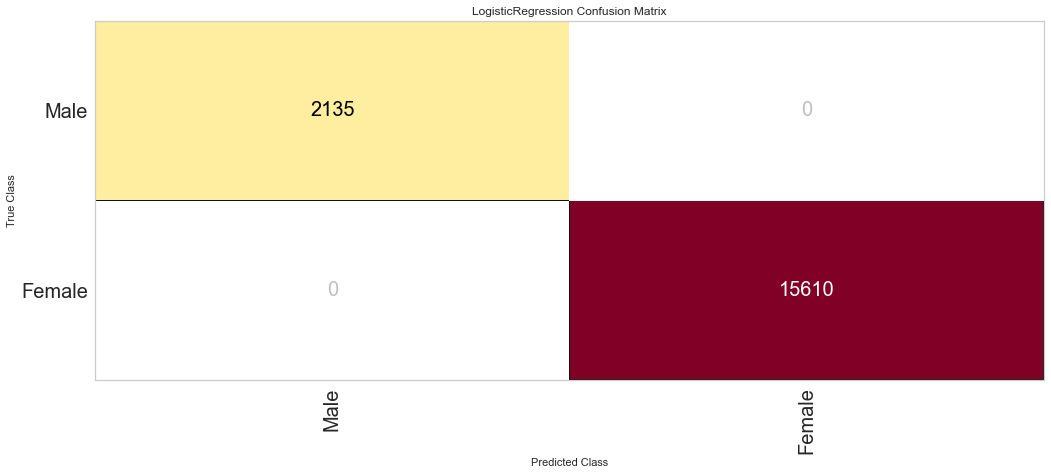

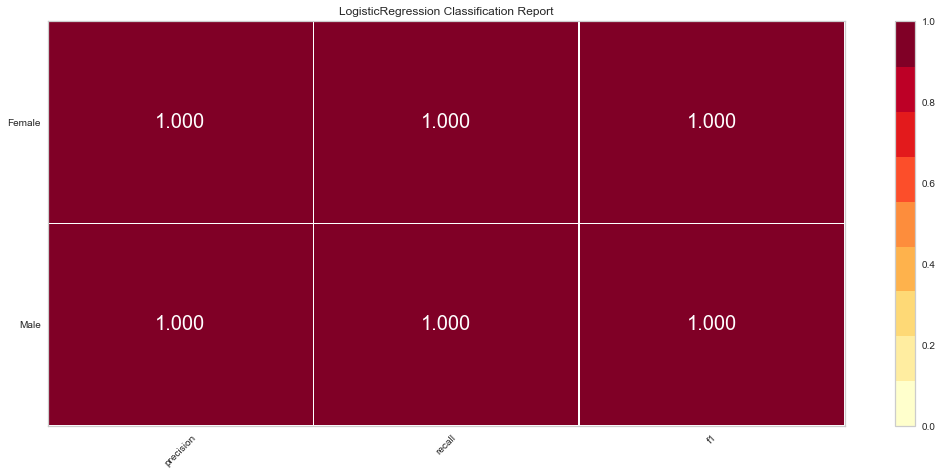

In [107]:
# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Male','Female']
cm = ConfusionMatrix(model, classes = classes, 
                     percent = False)

# Fit fits the passed model. 
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, and then create the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# Change the fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data to the visualizer
# Evaluate the model on the test data
visualizer.fit(X_train, y_train)  
visualizer.score(X_val, y_val)  
g = visualizer.poof()

